# Normal Modes of $CO_{2}$

This simulation will model the vibrational modes of $CO_{2}$. We will perform analytical calculations for the frequencies of $CO_{2}$ to determine whether the simulation was successful. The masses will be in kilograms, while the frequencies will be converted to hertz and compared to the IR spectrum to ensure that the simulation was successful. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from vpython import * #watch out for namespace conflicts

# calculate eigenvalues and eigenvectors
from scipy.linalg import eigh

# print to markdown
from IPython.display import display, Markdown, Latex

<IPython.core.display.Javascript object>

## Research Questions

1. Can I successfully model the two modes of $CO_{2}$ to get the correct frequency?
2. How does change the bond stiffness change the frequencies?

## Assumptions

1. To get the fundamental frequency based on the literature we assume the bond stiffness is 2000 N/m to get the fundamental frequency.
2. The frequency of the photon absorb matches the frequency of oscillation
3. Quantum Oscillator

## Theoretical Background describe each variable

This equation is used to solve for omega where <mark >m</mark> is the mass of oxygen and <mark >k</mark> $N/m$ is bond stiffiness

$$\omega = \sqrt\frac{K}{m}$$

This equation is used to solve for omega where <mark >m</mark> is mass of oxygen, <mark >M</mark> is the mass of carbon, and <mark >k</mark> is bond stiffiness

$$\omega = \sqrt\frac{K(m+M)}{mM}$$

Omega is in newtons per meter and to get the frequcienies in hertz we used this to convert both omega values to hertz

$$f = \frac{\omega}{2\pi}$$

## Computational Model

For 3 masses the  would be:
$$ka_1-ka_2 + 0 = m_1\omega^2a_1$$

$$-ka_1+2ka_2 - ka_3 = m_2\omega^2a_2$$

$$0 -ka_2 + ka_3 = m_3\omega^2a_3$$

The matrices had to be determined to write the simulation. Since we have three atoms total but two different masses, we substituted m1 for m3.
$$
\left[ {\begin{array}{ccc}
   k & -k & 0 \\
   -k & 2k & -k \\
   0 & -k & k \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
  = \omega^2
\left[ {\begin{array}{ccc}
   m_1 & 0 & 0 \\
   0 & m_2 & 0 \\
   0 & 0 & m_1 \\
  \end{array} } \right]
\left[ {\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3 \\
  \end{array} } \right]
$$


$CO_{2}$ has 4 different vibrational modes
1. Assymetric 
2. Symmetric 
3. Bending
4. Bending

In this model we will produce 2 vibrational modes of $CO_{2}$; assymetric and symmetric. The symetric streching does not appear on the IR spectra but Symmetric does.

- The symmetric model is pictured below. The carbon is in the center, and the two oxygens are on the outside. The carbon atom stays still while the two oxygen atoms are outward than inwards.

<img src="Symetric.png" width=200>



- The asymmetric model is pictured below. Where carbon is in the center, the two oxygens are on the outside. The carbon atom moves in the opposite direction of the two oxygen atoms.

<img src="Asymetric.png" width=200>

## Constants

In [50]:
M = 1.9944e-26 #mass of carbon in kg
m = 2.65669e-26 #mass of oxygen in kg
N = 3
k = 2000

# M = 12
# m = 16
# N = 3
# k = 10
#380e3/6e23*2/143e-12**2

## Validation

In [51]:
omegather1 = np.sqrt(k/m)

omegather2 = np.sqrt(k*(2*m+M)/(m*M))

f1theor = omegather1/(2*pi)
f2theor = omegather2/(2*pi)
print("synmmetric mode: {:.3e} Hz".format(f1theor))
print("asynmmetric mode: {:.3e} Hz".format(f2theor))

synmmetric mode: 4.367e+13 Hz
asynmmetric mode: 8.359e+13 Hz


To get the first frequency of $CO_{2}$ that was determined from the literature we needed to adjust the bond stiffness. However, the result of the asymmetric mode did not match the literature with that specific bond stiffness so we are assuming there are other factors coming into play when we are modeling $CO_{2}$.

In [52]:
#Build matrices
A=np.zeros((N,N))

for i in range(N):
    A[i,i] = 2*k #the diagonal
    if i==0: #first row
        A[0,i+1]=-k
        A[i,i] = k #free end
    elif i==N-1: #last row
        A[i,i-1]=-k
        A[i,i] = k #free end
    else:
        A[i,i-1]=-k
        A[i,i+1]=-k

B=np.identity(N)
B[0,0]= m
B[1,1]= M
B[2,2]= m

#find eigenvalues and eigenvectors
lamb, a = eigh(A, B)        # eigenvalues and eigenvectors
omegas = np.sqrt(lamb)

print("\n frequencies (omega):", omegas)
print("\n eigenvectors are column vectors in:\n\n", a)
print()
f1 = omegas[1]/(2*pi)
f2 = omegas[2]/(2*pi)
print("synmmetric mode: {:.3e} Hz".format(f1))
print("asynmmetric mode: {:.3e} Hz".format(f2))


 frequencies (omega): [           nan 2.74375012e+14 5.25207787e+14]

 eigenvectors are column vectors in:

 [[-3.69919536e+12 -4.33824986e+12  2.26635512e+12]
 [-3.69919536e+12 -4.42173960e-04 -6.03790914e+12]
 [-3.69919536e+12  4.33824986e+12  2.26635512e+12]]

synmmetric mode: 4.367e+13 Hz
asynmmetric mode: 8.359e+13 Hz


/var/folders/45/085j8s7n4_98m41sz56brzj00000gn/T/ipykernel_21318/1204372130.py:23: RuntimeWarning: invalid value encountered in sqrt
  omegas = np.sqrt(lamb)


It is okay to get an error. However, we expected this since the first frequency does not exist because it is minimal compared to the remaining frequencies making it negligible.

In [55]:
def plotmode(mode):  
    
    modeindex = mode-1
    h = 1e-16
    ttotal = 4*1/f1 #total time for calculations

    # array of times
    t = np.arange(0,ttotal,h)

    # build data array with all data; u[:,0] is time; other columns are u_i for each atom i
    u = np.zeros((len(t), N+1))

    u[:,0] = np.transpose(t) #t.T

    for i in range(N):
        u_atom = a[i,modeindex]*np.cos(omegas[modeindex]*t)
        u[:,i+1] = np.transpose(u_atom)[:]

    # plot
    plt.figure(figsize=(12,8))
    plt.title("displacement of each atom")
    plt.xlabel("t (s)")
    plt.ylabel("$u_i$ (m)")
    for i in range(N): #plot each atom
        plt.plot(u[:,0], u[:,i+1], label="atom {:d}".format(i+1))
    plt.grid()
    plt.legend()
    plt.show()
    
    return

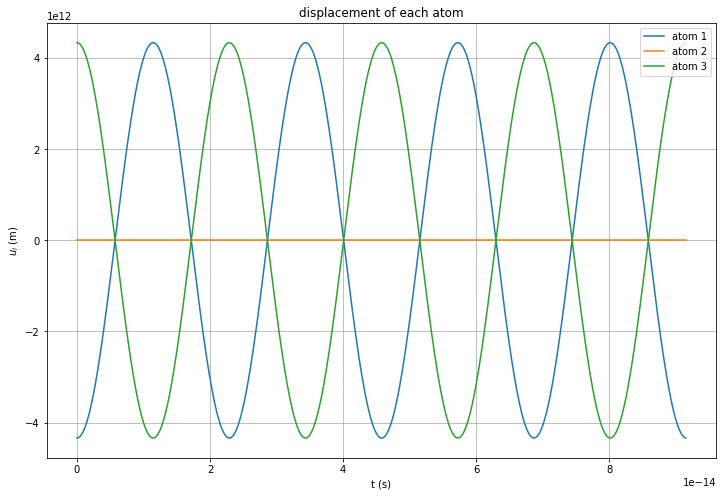

In [57]:
plotmode(2)

As shown above the symmetric model is shown. As shown above, we expect atom 2 (the oxygen) to be constant the entire time while atoms 1 and 3 (carbon) oscillate back and forth.

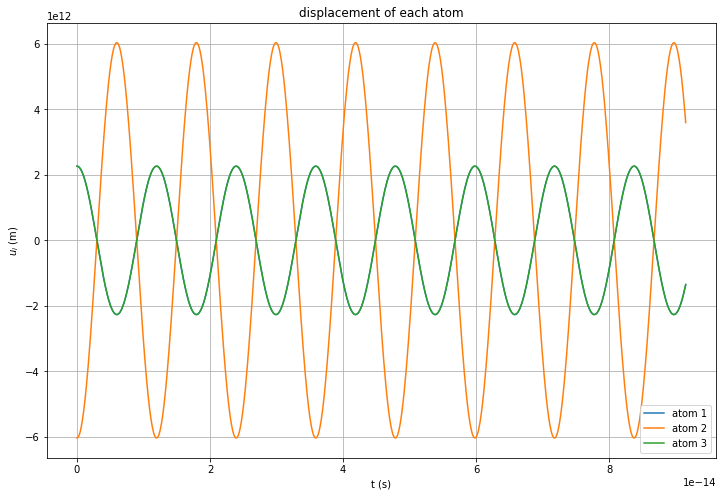

In [58]:
plotmode(3)

As shown above, the asymmetric model is shown. We expect atom 2 (oxygen) to oscillate back and forth in the opposite direction of both of the carbons. Instead, atoms 1 and 3 (carbon) oscillate in the sink back and forth, and this is why you can only see atom three since they are both on top of each other.

## Conclusion

Overall this simulation modeled $CO_{2}$ of 2 out of the four vibrational modes (asymmetric and symmetric). First, we had to ensure the frequencies were converted and agreed adequately with the literature. The first frequency agreed, but the second one did not quite match up for other unknown reasons. To get the first frequency to match the literature the bond stiffiness was determined by trial and error to match the litature frequency. Validation of or frequencies matched the simulation, and we proceeded to plot the two vibrational modes. The asymmetric and symmetric modes matched up with the literature. 